<a href="https://colab.research.google.com/github/caiobmbr/datascience-projects/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo"  width="80%" src="https://raw.githubusercontent.com/caiobmbr/datascience-projects/master/banner_v1.0.png">

**Data Science na Prática 2.0.**
*by [Caio Melo](https://github.com/caiobmbr/datascience-projects)*

## Analisando a Violência no Rio de Janeiro
---

O Brasil é conhecido por ser um país que enfrenta diariamente a questão da segurança pública e o Rio de Janeiro é um caso especial nesse sentido. O nível alarmante de casos de roubo, furtos e atendados à vida é sempre evidenciado nos noticiários.

<img alt="Rio de Janeiro landscape" width="80%" src="https://images.unsplash.com/photo-1552428386-840770ff7588?ixlib=rb-1.2.1&auto=format&fit=crop&w=1953&q=80">

Atualmente, as leis de acesso à informação e a conscientização dos órgãos públicos, vêm proporcionando a disponibilização de várias fontes de dados.

Como exemplo, o governo do Rio de Janeiro traz a iniciativa do [portal ISPDados](http://www.ispdados.rj.gov.br/estatistica.html). 

Neste notebook, faremos uma análise em cima dos indicadores estatísticos da violência no Rio, explorando algumas das variáveis fornecidas.



## Obtenção dos Dados

Os dados foram obtidos diretamente do portal ISPDados, que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro. O arquivo `csv` utilizado nessa análise foi pré-processado pelo professor Carlos Melo, com intuito de focar nos pontos de interesse da análise e que pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.



In [ ]:
# importação das bibliotecas para uso na análise
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# importando a base de dados
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

## Análise inicial dos dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados. 

O dicionário de variáveis não foi encontrado em sua totalidade no site do portal ISPDados portanto segue abaixo apenas a descrição dos nomes das colunas (variáveis) do dataset, junto com o tipo de dado para cada variável. A maioria das variáveis apresenta dados quantitativos das mais diversas situações de violências que foram contabilizadas.

Apenas as colunas `vano` e `mes` representam dados não-numéricos pois são marcos temporais. Todos as outras variáveis representam quantidades de ocorrências de violência.


In [ ]:
# mostrar os nomes e tipos de dados das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   vano                        344 non-null    int64  
 1   mes                         344 non-null    int64  
 2   hom_doloso                  344 non-null    int64  
 3   lesao_corp_morte            248 non-null    float64
 4   latrocinio                  344 non-null    int64  
 5   hom_por_interv_policial     260 non-null    float64
 6   tentat_hom                  344 non-null    int64  
 7   lesao_corp_dolosa           344 non-null    int64  
 8   estupro                     200 non-null    float64
 9   hom_culposo                 260 non-null    float64
 10  lesao_corp_culposa          248 non-null    float64
 11  roubo_comercio              344 non-null    int64  
 12  roubo_residencia            344 non-null    int64  
 13  roubo_veiculo               344 non

### Apresentação do dataframe

Antes de iniciar qualquer análise, vamos verificar a cara do nosso dataframe, analisando as 5 primeiras entradas

In [ ]:
# mostrar as cinco primeiras entradas do dataset
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


### Tamanho do dataframe e valores ausentes

O formato do dataframe apresenta diversos valores ausentes devido à forma com que o mesmo foi preenchido ou em que começaram a ser registrados certos tipos de ocorrências. Por exemplo, variáveis relacionadas à bicicletas possuem o mesmo padrão de ausência de valores. 

Entradas:	344
Variáveis:	56

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279

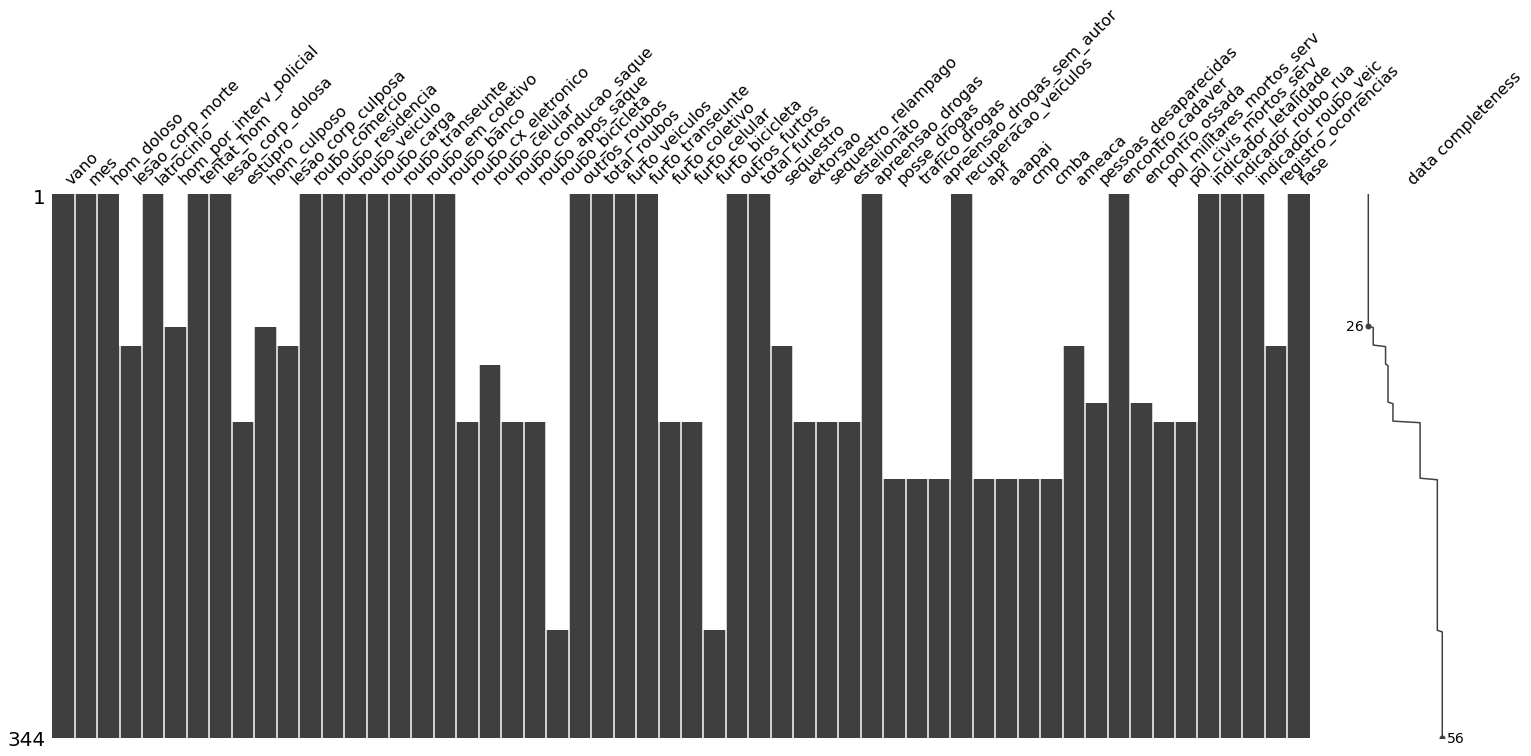

In [ ]:
# mostrando o tamanho do dataframe
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}\n".format(df.shape[1]))

# encontrando percentual de valores ausentes
print((df.isnull().sum()/len(df)).sort_values(ascending=False))

# plotar matrix de perfil das variáveis em relação à valores faltantes
msno.matrix(df,labels=True)
plt.show()

## Recuperação de veículos em furtos e roubos 

Para essa parte da análise, visto o perfil do dataframe disponível, iremos nos ater basicamente a três variáveis: `roubo_veiculo`, `furto_veiculos` e `recuperacao_veiculos`. Somente para uma melhor contextualização, o crime de furto não envolve ato violento, ao contrário do roubo. Portanto, iremos utilizar o método `describe()` para nos situar de uma forma geral sobre essas três variáveis, pois nosso foco nesta parte será analisarmos o percentual de recuperação de veículos, que se dá pela seguinte fórmula:

$$\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$$


In [ ]:
df[['vano','roubo_veiculo', 'furto_veiculos', 'recuperacao_veiculos']].describe()

,vano,roubo_veiculo,furto_veiculos,recuperacao_veiculos
count,344.000000,344.000000,344.000000,344.000000
mean,2004.837209,2448.697674,1674.671512,1772.238372
std,8.289036,789.689559,294.852020,656.761843
min,1991.000000,1097.000000,1159.000000,729.000000
25%,1998.000000,1889.750000,1430.500000,1276.750000
50%,2005.000000,2322.000000,1637.500000,1755.000000
75%,2012.000000,2778.000000,1833.250000,2202.000000
max,2019.000000,5358.000000,2630.000000,3695.000000


Analisando o resultado do método `describe()`, aparamente não temos outliers siginificativos à ponto de necessitar alguma tratativa neste caso.

De posse dos dados entre 1991 e 2019, vamos averiguar quais são as médias mensais de furto, roubo e recuperação de veículos

In [ ]:
# cálculo das médias mensais das variáveis para todo o dataframe
roubo_veiculo_media_global = df.roubo_veiculo.mean()
furto_veiculos_media_global = df.furto_veiculos.mean()
recuperacao_veiculos_media_global = df.recuperacao_veiculos.mean()
porcentagem_recuperacao_media_global = 100 * recuperacao_veiculos_media_global / (roubo_veiculo_media_global + furto_veiculos_media_global)

print("Média mensal de roubo:\t{:.2f}".format(roubo_veiculo_media_global))
print("Média mensal de furto:\t{:.2f}".format(furto_veiculos_media_global))
print("Média mensal de recuperação:\t{:.2f}".format(recuperacao_veiculos_media_global))
print("Porcentagem global de recuperação:\t{:.2f}%".format(porcentagem_recuperacao_media_global))

Média mensal de roubo:	2448.70
Média mensal de furto:	1674.67
Média mensal de recuperação:	1772.24
Porcentagem global de recuperação:	42.98%


Podemos perceber que considerando todas as entradas entre os anos de 1991 e 2019, na média a recuperação de veículos estaria entre 42,98% dividindo-se a média de `recuperacao_veiculos` pela soma das médias de `roubo_veiculo` com `furto_veiculo`. 

Contudo, uma outra análise pertinenten seria avaliar como o percentual de recuperação de veículos vem se desenvolvendo ao longo dos anos no Rio de Janeiro

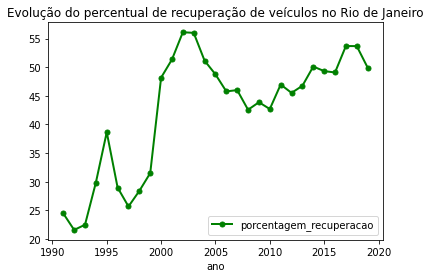

,ano,roubo_veiculo_media,furto_veiculos_media,recuperacao_veiculos_media,porcentagem_recuperacao
0,1991,1371.000000,1998.250000,824.166667,24.461428
1,1992,2041.833333,2301.583333,937.166667,21.576716
2,1993,2065.833333,2241.416667,968.250000,22.479540
3,1994,2289.166667,2185.916667,1335.833333,29.850468
4,1995,1973.000000,1827.333333,1468.500000,38.641347


In [ ]:
# cálculo das médias das variáveis por ano
df_roubo_veiculo = df.groupby(by=['vano']).roubo_veiculo.mean()
df_furto_veiculos = df.groupby(by=['vano']).furto_veiculos.mean()
df_recuperacao_veiculos = df.groupby(by=['vano']).recuperacao_veiculos.mean()

# construção do dataframe auxiliar das médias
df_veiculos = pd.concat([df_roubo_veiculo, df_furto_veiculos, df_recuperacao_veiculos], axis=1).reset_index()
df_veiculos.columns = ['ano','roubo_veiculo_media', 'furto_veiculos_media', 'recuperacao_veiculos_media']
df_veiculos['porcentagem_recuperacao'] = 100 * df_veiculos.recuperacao_veiculos_media / (df_veiculos.roubo_veiculo_media + df_veiculos.furto_veiculos_media)

# apresentando novo dataframe de roubo, furto e recuperacao de veículos, junto com o gráfico de evolução do percentual de recuperação de veículos 
df_veiculos.plot(x='ano',y='porcentagem_recuperacao',lw=2, colormap='ocean', marker='.', markersize=10, title='Evolução do percentual de recuperação de veículos no Rio de Janeiro')
plt.show()
df_veiculos.head()

Pelo gráfico, podemos perceber que houve um aumento na efetividade da recuperação de veículos do início da década de 90, com uma queda em meados de 1997 mas retornando a crescer até meados de 2003. Contudo, de 2003 à 2020 houve quem em mais de 10 p.p mas atualmente retornando quase ao mesmo partamar de 2004 (em torno de 55%).

## Homicidios dolosos

Homicídio doloso é aquele caso em há a intenção de matar ou o sujeito assume o risco de fazê-lo. Os casos dessa natureza estão representados no dataframe pela variável `hom_doloso`. 

Vamos analisar um histograma da varíavel, além de observamos quais foram os anos com o máximo e minímo de casos dessa natureza. Histogramas são poderosas ferramentas de visualização, que nos auxiliam a entender a distribuição dos valores em uma variável.

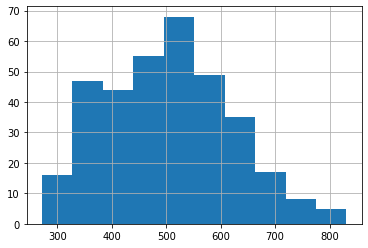

In [ ]:
# plotando o histograma sobre homicídios dolosos
df.hom_doloso.hist()
plt.show()

Algumas observações possíveis com base no histograma acima:

* Houveram quase 70 meses com homicídios dolosos entre 500 e550  registrados ao longo do período em estudo.
* Houveram menos de 10 meses ao longo de todo o período estudado na casa de 800 registros de homicídio doloso.
* O histograma apresenta uma distribuição normal em torno da média de ocorências e não há indícios preliminares sobre a presença de outliers na variável.

Agora vamos identificar qual foi o máximo e mínimo registrado para a variável hom_doloso ao longo do período observado no dataset.

In [ ]:
# valores max e min de hom_doloso
max_hom_doloso = df.hom_doloso.max()
min_hom_doloso = df.hom_doloso.min()

# imprimir os valores máximos e mínimos
print("Min:\t{} casos".format(min_hom_doloso))
print("Max:\t{} casos".format(max_hom_doloso))

Min:	272 casos
Max:	831 casos


De posse dos valores máximos e mínimos de homícios dolosos, vamos analisar em qual e mês ocorreram esses valores.

In [ ]:
# Ano e mês para o registro mínimo de homícios dolosos
df[['vano', 'mes', 'hom_doloso']][df.hom_doloso == min_hom_doloso]

,vano,mes,hom_doloso
293,2015,6,272


In [ ]:
# Ano e mês para o registro máximo de homícios dolosos
df[['vano', 'mes', 'hom_doloso']][df.hom_doloso == max_hom_doloso]

,vano,mes,hom_doloso
48,1995,1,831


O maior registro de homícios dolosos aconteceu em 1995 e o menor em 2015, ou seja, 20 anos depois. Isso é um bom sinal mas não que não pode afirmar essa tendência de redução. Para confirmarmos essa hipotese, vamos plotar um gráfico de registro de homícios dolosos registradados por ano.

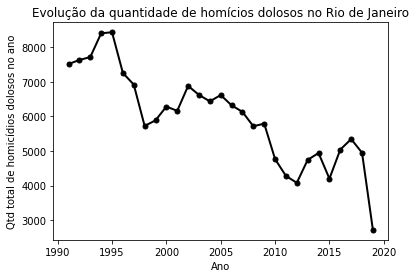

In [ ]:
# plotar o gráfico sobre a evolução da quantidade de registro de homícios dolosos por ano no Rio de Janeiro
df_hom_doloso = df.groupby(by=['vano']).hom_doloso.sum()

ax = df_hom_doloso.plot(lw=2, colormap='bone', marker='.', markersize=10, title='Evolução da quantidade de homícios dolosos no Rio de Janeiro')
ax.set_xlabel("Ano")
ax.set_ylabel("Qtd total de homicídios dolosos no ano")
plt.show()

## Roubos em coletivos

Portanto Gráfico de linhas para a variável `roubo_em_coletivo`

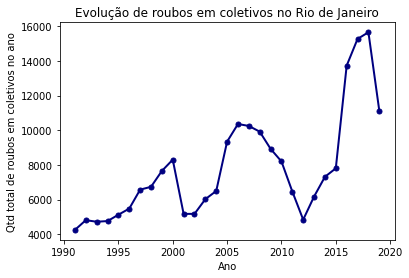

In [ ]:
# plotar o gráfico sobre a evolução da quantidade roubos em coletivo por ano no Rio de Janeiro
df_roubo_em_coletivo = df.groupby(by=['vano']).roubo_em_coletivo.sum()

ax1 = df_roubo_em_coletivo.plot(lw=2, colormap='jet', marker='.', markersize=10, title='Evolução de roubos em coletivos no Rio de Janeiro')
ax1.set_xlabel("Ano")
ax1.set_ylabel("Qtd total de roubos em coletivos no ano")
plt.show()

## Conclusão

O projeto em questão conseguiu trazer luz à alguns aspectos do complexo cenário de violência que assola o Rio de Janeiro há décadas. Foi possível chegar aos seguintes insights, alguns indo na contra-mão do senso comum:

* A recuperação de veículos subtraídos no Rio de Janeiro vêm uma têndencia de crescimento nas últimas duas décadas
* Quantidade de homicidios dolosos apresenta uma têndencia de redução bastante acelerada se consideramos a quantidade casos no início da década de 90 e quantidade de casos de 2019.
* No aspecto de roubos em coletivo, infelizmente o Rio de Janeiro demonstra uma têndencia de crescimento dos casos, especialmente de forma acelerada à partir de 2011.

Outro aprendizado possível com a análise foi a necessidade de se atentar a cada detalhe do seu *dataset* quando se está lidando com dados reais, extraídos diretamente de sites e portais com dados abertos.

Muitas vezes, nos acostumamos a usar dados de competições ou cursos, que estão perfeitos.

Importante ressaltar que a etapa de aquisição, tratamento e exploração dos dados é o que mais vai consumir o tempo de um projeto de Data Science.